In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key


In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [55]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)
lat_lngs

In [56]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = (zip(x, y))

In [57]:
# Use the tuple() function to display the latitude and longZZZitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [58]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [59]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
#print(cities)

81

In [60]:
# Create an empty list to hold the weather data.
#city_data = []
# Print the beginning of the logging.
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters.
#record_count = 1
#set_count = 1

In [61]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
 #   if (i % 50 == 0 and i >= 50):
  #      set_count += 1
   #     record_count = 1
    #    time.sleep(60)

    # Create endpoint URL with each city.
   # city_url = url + "&q=" + cities[i]

In [62]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
         # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | melbu
Processing Record 2 of Set 1 | mezen
Processing Record 3 of Set 1 | riyadh
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | pimentel
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | bichena
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | port hardy
Processing Record 12 of Set 1 | castro marim
Processing Record 13 of Set 1 | alofi
Processing Record 14 of Set 1 | hovd
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | arkhipo-osipovka
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | play cu
City not f

In [63]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Melbu,68.5044,14.8297,28.18,74,40,3.44,NO,2022-04-28 21:40:58
1,Mezen,65.8522,44.2400,26.71,75,89,12.97,RU,2022-04-28 21:40:59
2,Riyadh,24.6877,46.7219,69.94,50,100,3.65,SA,2022-04-28 21:36:03
3,New Norfolk,-42.7826,147.0587,56.66,87,3,3.11,AU,2022-04-28 21:40:59
4,Pimentel,-6.8367,-79.9342,70.09,68,0,20.71,PE,2022-04-28 21:41:00
5,Bengkulu,-3.8004,102.2655,77.05,86,100,4.68,ID,2022-04-28 21:41:00
6,Mataura,-46.1927,168.8643,48.07,88,15,1.34,NZ,2022-04-28 21:41:01
7,Rikitea,-23.1203,-134.9692,77.20,65,31,20.31,PF,2022-04-28 21:41:01
8,Bichena,10.4500,38.2000,56.88,74,65,0.76,ET,2022-04-28 21:41:01
9,Hamilton,39.1834,-84.5333,64.76,46,75,11.50,US,2022-04-28 21:38:23


In [64]:
#reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [66]:
#we assign a new or the same DataFrame with new column order:

city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Melbu,NO,2022-04-28 21:40:58,68.5044,14.8297,28.18,74,40,3.44
1,Mezen,RU,2022-04-28 21:40:59,65.8522,44.2400,26.71,75,89,12.97
2,Riyadh,SA,2022-04-28 21:36:03,24.6877,46.7219,69.94,50,100,3.65
3,New Norfolk,AU,2022-04-28 21:40:59,-42.7826,147.0587,56.66,87,3,3.11
4,Pimentel,PE,2022-04-28 21:41:00,-6.8367,-79.9342,70.09,68,0,20.71
...,...,...,...,...,...,...,...,...,...
67,Fortuna,US,2022-04-28 21:42:25,40.5982,-124.1573,61.93,59,20,12.66
68,Akureyri,IS,2022-04-28 21:42:25,65.6835,-18.0878,48.13,46,40,5.75
69,Nizwa,OM,2022-04-28 21:42:21,22.9333,57.5333,82.63,41,46,2.33
70,Katsuura,JP,2022-04-28 21:42:26,35.1333,140.3000,62.24,84,100,12.21


In [68]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [69]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

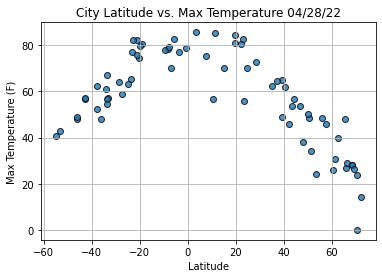

In [71]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

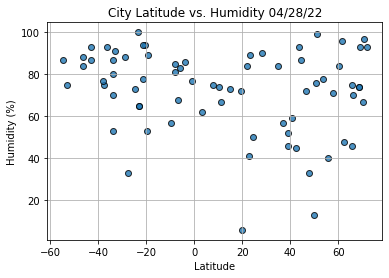

In [72]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

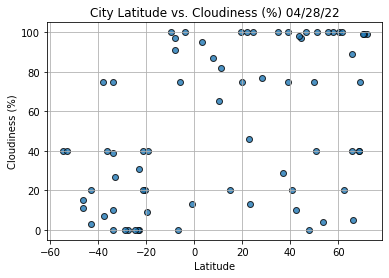

In [73]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

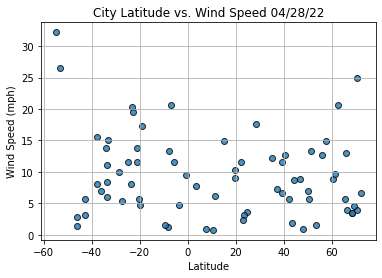

In [74]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()